Epoch 1/10
1563/1563 [==============================] - 18s 9ms/step - loss: 1.6574 - accuracy: 0.4436 - val_loss: 1.3176 - val_accuracy: 0.5355
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2060 - accuracy: 0.5743 - val_loss: 1.1820 - val_accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0718 - accuracy: 0.6267 - val_loss: 1.1190 - val_accuracy: 0.6189
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9759 - accuracy: 0.6594 - val_loss: 1.0909 - val_accuracy: 0.6253
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9030 - accuracy: 0.6842 - val_loss: 1.0866 - val_accuracy: 0.6386
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8408 - accuracy: 0.7068 - val_loss: 1.0541 - val_accuracy: 0.6455
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7935 - accuracy: 0.7243 - val_loss: 1.0866 - val_accurac

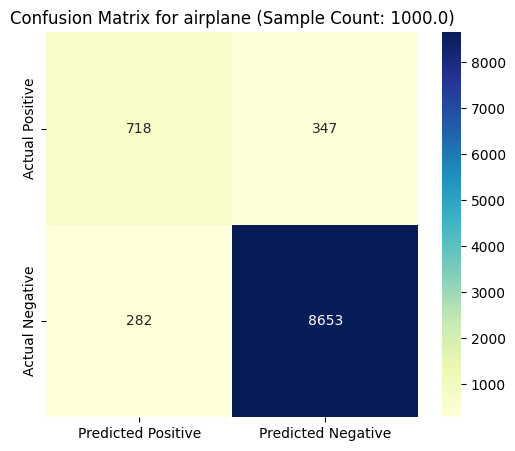

---------------------------------------------------------------------------


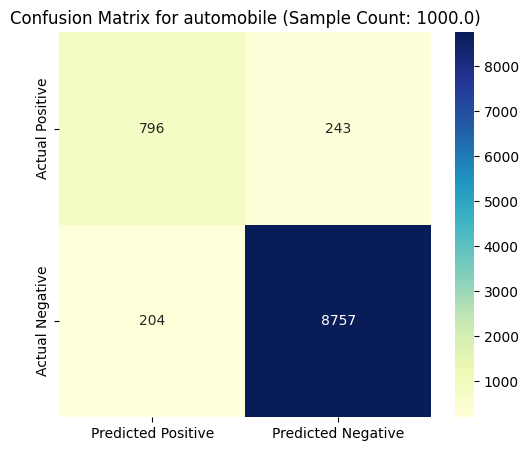

---------------------------------------------------------------------------


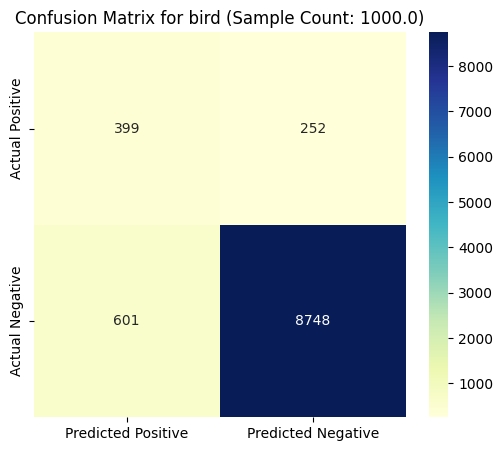

---------------------------------------------------------------------------


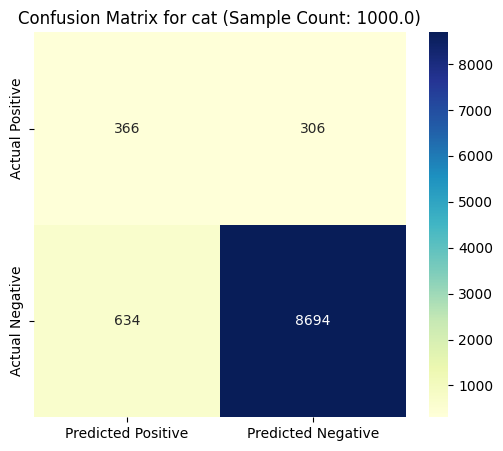

---------------------------------------------------------------------------


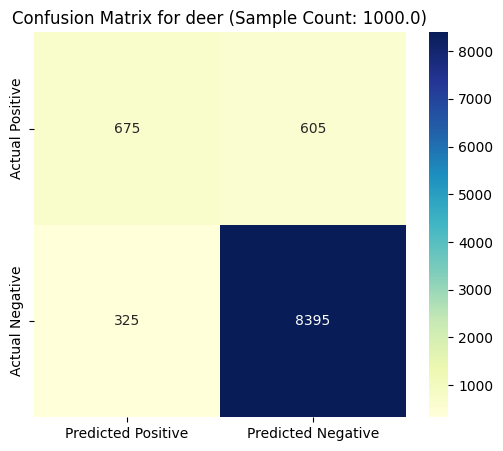

---------------------------------------------------------------------------


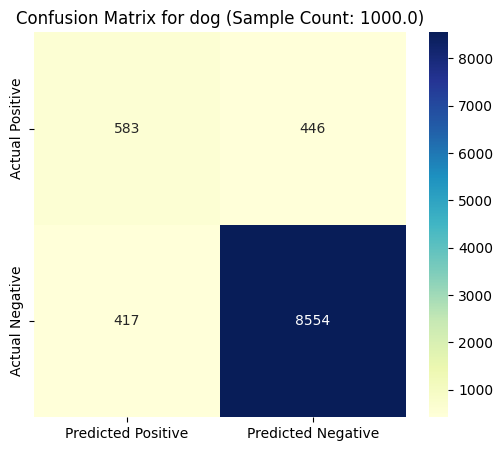

---------------------------------------------------------------------------


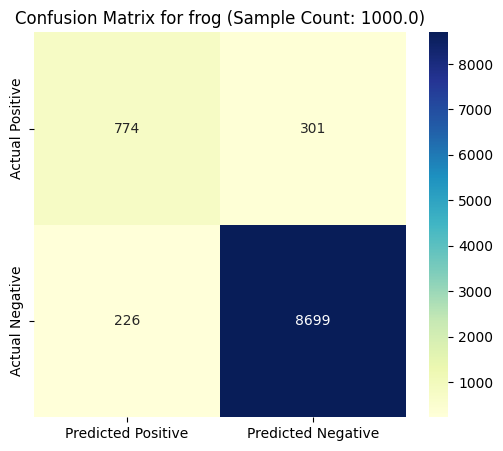

---------------------------------------------------------------------------


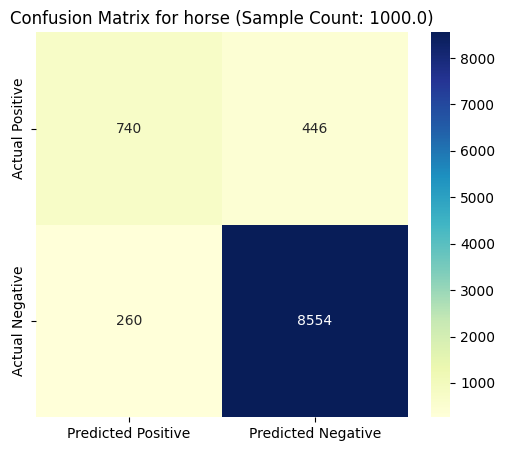

---------------------------------------------------------------------------


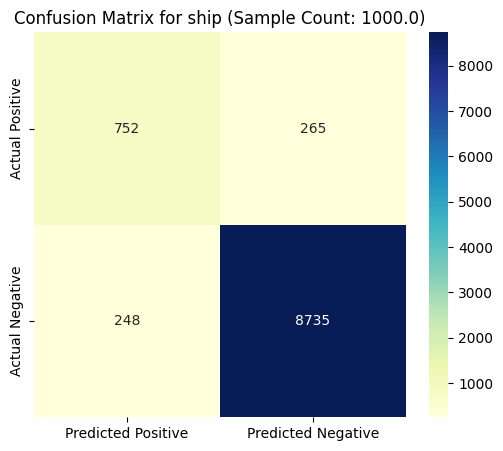

---------------------------------------------------------------------------


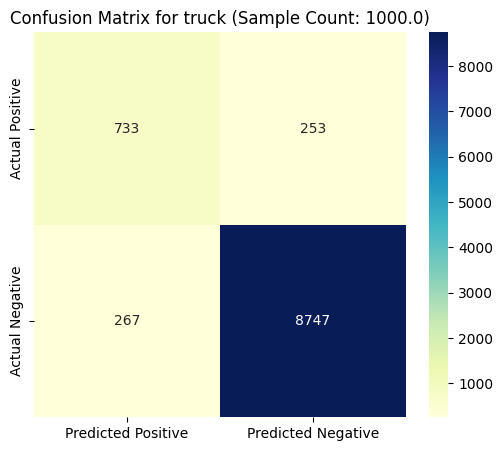

---------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# data load
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
# 1. Evrişim katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# 2. Evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

In [ ]:
# Modeli derleyin
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

In [ ]:
# CIFAR-10 sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Her sınıfa ait örnek sayısını hesapla
class_sample_counts = np.sum(y_test, axis=0)

In [ ]:
# Model tahminlerini al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
# Karışıklık matrisini oluştur
cm = confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Her sınıf için karışıklık matrisini ayrı ayrı görselleştir
for i, class_name in enumerate(class_names):
    class_cm = np.zeros((2, 2), dtype=int)
    for j in range(len(y_true)):
        if y_true[j] == i:
            if y_pred_classes[j] == i:
                class_cm[0, 0] += 1  # True Positive
            else:
                class_cm[1, 0] += 1  # False Negative
        else:
            if y_pred_classes[j] == i:
                class_cm[0, 1] += 1  # False Positive
            else:
                class_cm[1, 1] += 1  # True Negative

In [ ]:
    # Karışıklık matrisini görselleştirme
    plt.figure(figsize=(6, 5))
    sns.heatmap(pd.DataFrame(class_cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative']), annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion Matrix for {class_name} (Sample Count: {class_sample_counts[i]})')
    plt.show()
    print('-'*75)


# **Confusion Matrix (Karmaşıklık Matrisi):**


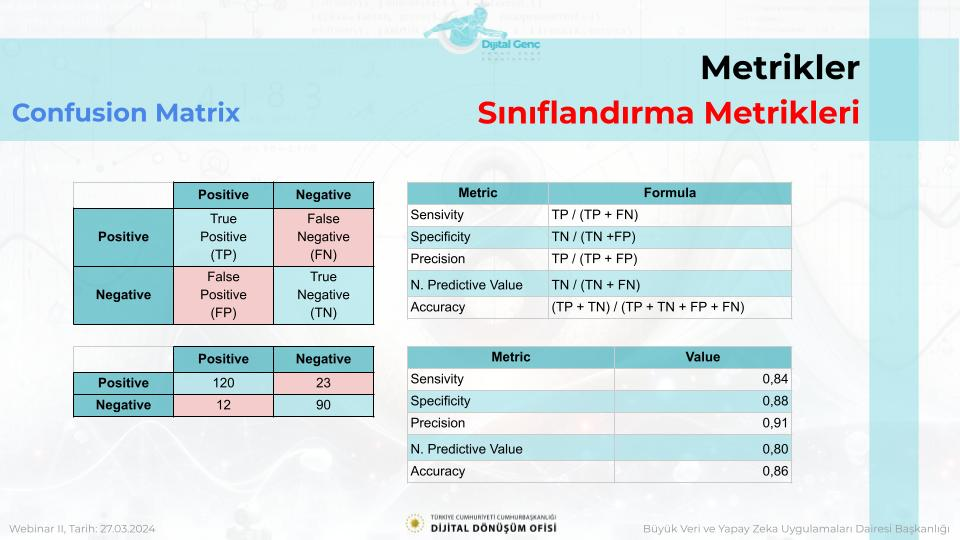




 Bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir metriktir.
 Bu matris, modelin gerçek ve tahmin edilen sınıf etiketlerini karşılaştırır ve bu karşılaştırmayı dört farklı kategoriye ayırır.

>True Positive (TP): Gerçek etiketi pozitif olan ve modelin de doğru bir şekilde pozitif olarak tahmin ettiği örnekler.

>False Positive (FP): Gerçek etiketi negatif olan ancak modelin pozitif olarak yanlış bir şekilde tahmin ettiği örnekler.

>True Negative (TN): Gerçek etiketi negatif olan ve modelin de doğru bir şekilde negatif olarak tahmin ettiği örnekler.

>False Negative (FN): Gerçek etiketi pozitif olan ancak modelin negatif olarak yanlış bir şekilde tahmin ettiği örnekler.


## Sınıflandırma Değerlendirme Metrikleri:
Sınıflandırma problemlerinde kullanılan F1 score, recall ve precision metrikleri modelin performansını değerlendirmek için kullanılan önemli ölçütlerdir. Bu metriklerin her biri farklı açılardan modelin performansını değerlendirir ve birbirleriyle ilişkilidir.



###1. **Accuracy (Doğruluk)**:
Doğruluk, doğru tahmin edilen örneklerin toplam örnek sayısına oranıdır. Bu metrik, tüm sınıfların dengeli olduğu durumlarda kullanılabilir. Ancak, dengesiz sınıflar için tek başına yeterli olmayabilir.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$



###2. **Precision (Hassasiyet)**:
Precision, modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.
$$
 \text{Precision} = \frac{TP}{TP + FP}
$$

   Yüksek precision değeri, modelin pozitif olarak tahmin ettiği örneklerin çoğunun gerçekten pozitif olduğunu gösterir.



###3. **Recall (Duyarlılık)**:
 Recall, gerçek pozitif örneklerin ne kadarının doğru bir şekilde pozitif olarak tahmin edildiğini gösterir.
$$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

  Yüksek recall değeri, gerçek pozitif örneklerin çoğunun doğru bir şekilde tanındığını gösterir.



###4. **F1 Score**:
F1 score, precision ve recall metriklerinin harmonik ortalamasını alarak hesaplanır. Bu metrik, precision ve recall arasında denge sağlar ve dengeli bir performans ölçütü sunar.

  $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

   F1 score, modelin hem precision hem de recall açısından iyi performans göstermesi gereken durumlarda tercih edilir. Özellikle dengeli sınıflar veya dengesiz sınıflar (imbalance classes) için önemlidir.



###5. **ROC ve AUC (Receiver Operating Characteristic Curve ve Area Under the Curve)**:
ROC eğrisi, modelin farklı kesim noktalarında (thresholds) duyarlılık (recall) ve özgüllük (specificity) arasındaki ilişkiyi gösteren bir grafiktir. AUC, ROC eğrisinin altındaki alanı ifade eder. AUC değeri, modelin sınıflar arasındaki ayrım yeteneğini ölçer.


İlişki:
- Precision, modelin pozitif tahminlerinin doğruluğuna odaklanırken, recall gerçek pozitiflerin ne kadarını kapsadığına odaklanır.
- F1 score, precision ve recall'in harmonik ortalamasını alır, bu nedenle yüksek bir F1 score hem precision hem de recall'in yüksek olduğu bir durumu gösterir.
- Precision ve recall arasında genellikle bir denge vardır. Precision arttıkça recall azalabilir ve tam tersi. F1 score, bu dengeyi göz önünde bulundurarak modelin performansını değerlendirir.

# Uygulama Örneği

## Gerekli kütüphanelerin yüklenmesi

In [1]:
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Veri Setinin Yüklenmesi

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


## Model oluşturulması

In [3]:
model = Sequential()

# 1. Evrişim katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# 2. Evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katmanlar
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

## Model Derleme

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 16s 7ms/step - loss: 2.0231 - accuracy: 0.3847 - val_loss: 1.4412 - val_accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3599 - accuracy: 0.5178 - val_loss: 1.3319 - val_accuracy: 0.5244
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1951 - accuracy: 0.5799 - val_loss: 1.2062 - val_accuracy: 0.5883
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0781 - accuracy: 0.6243 - val_loss: 1.1498 - val_accuracy: 0.6047
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9919 - accuracy: 0.6550 - val_loss: 1.1229 - val_accuracy: 0.6275
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9179 - accuracy: 0.6825 - val_loss: 1.1544 - val_accuracy: 0.6210
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8500 - accuracy: 0.7064 - val_loss: 1.1630 - val_accuracy

## Tahminleri oluşturma

In [5]:
# Her sınıfa ait örnek sayısını hesapla
class_sample_counts = np.sum(y_test, axis=0)

# Model tahminlerini al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


##Karmaşıklık matrisi oluşturma ve görselleştirme

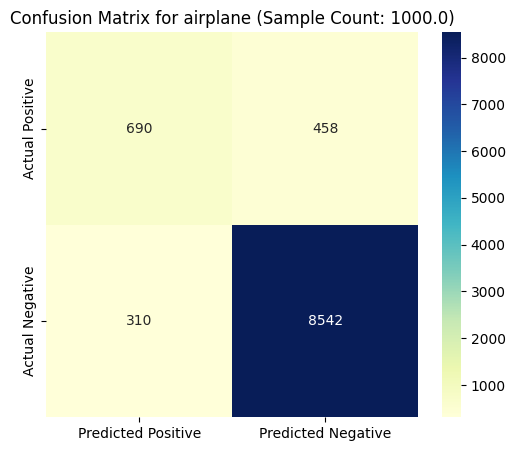

---------------------------------------------------------------------------


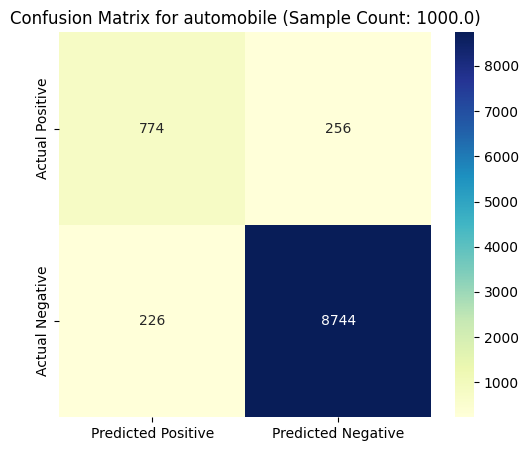

---------------------------------------------------------------------------


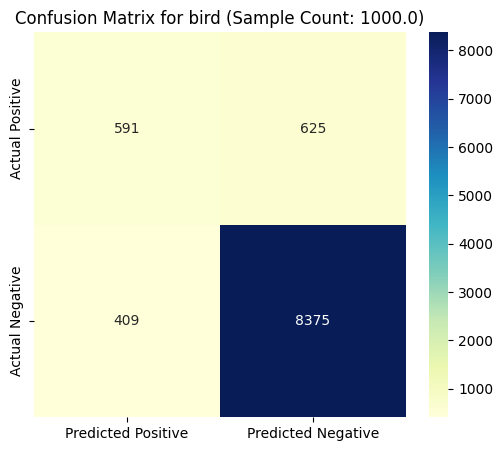

---------------------------------------------------------------------------


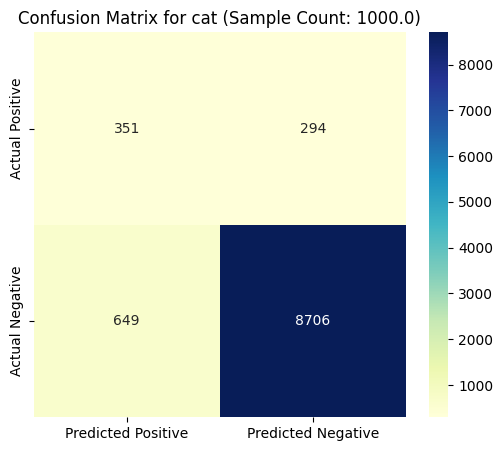

---------------------------------------------------------------------------


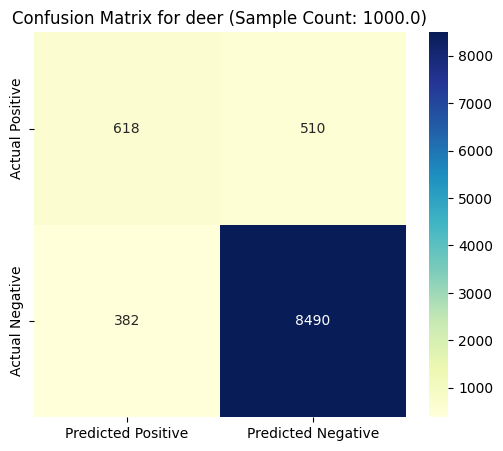

---------------------------------------------------------------------------


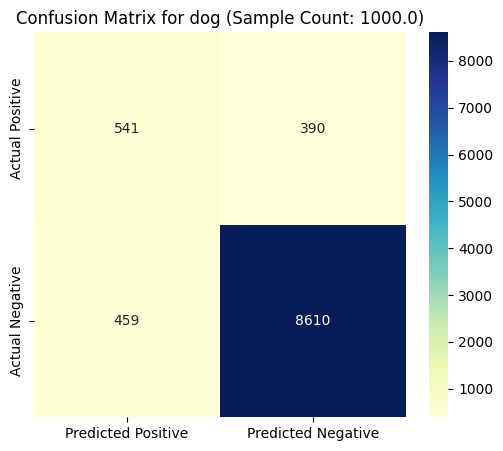

---------------------------------------------------------------------------


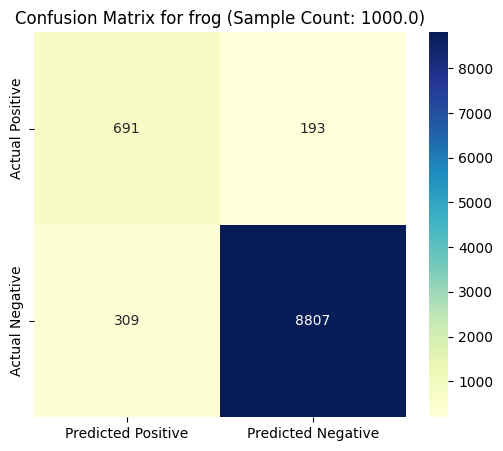

---------------------------------------------------------------------------


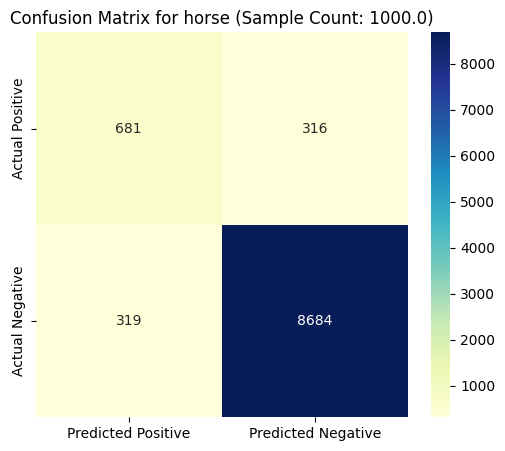

---------------------------------------------------------------------------


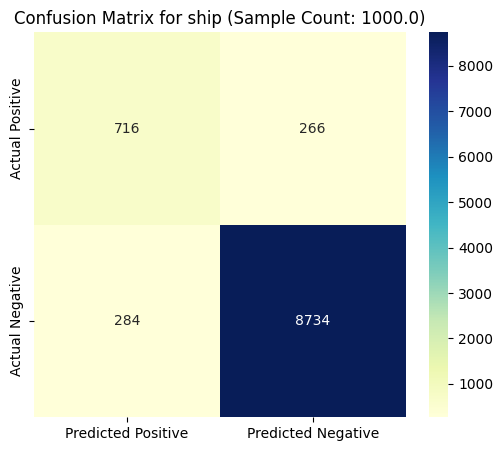

---------------------------------------------------------------------------


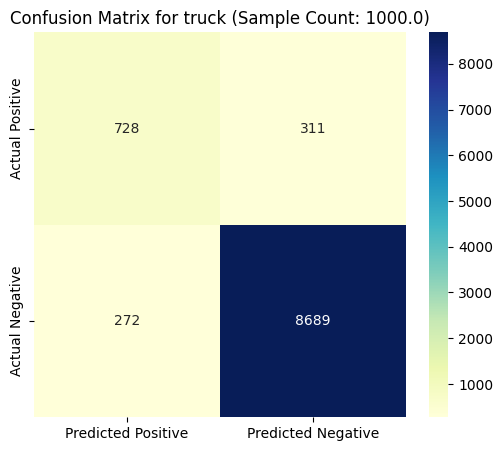

---------------------------------------------------------------------------


In [8]:
# Karışıklık matrisini oluştur
cm = confusion_matrix(y_true, y_pred_classes)

# Her sınıf için karışıklık matrisini ayrı ayrı görselleştir
for i, class_name in enumerate(class_names):
    class_cm = np.zeros((2, 2), dtype=int)
    for j in range(len(y_true)):
        if y_true[j] == i:
            if y_pred_classes[j] == i:
                class_cm[0, 0] += 1  # True Positive
            else:
                class_cm[1, 0] += 1  # False Negative
        else:
            if y_pred_classes[j] == i:
                class_cm[0, 1] += 1  # False Positive
            else:
                class_cm[1, 1] += 1  # True Negative
   # Karışıklık matrisini görselleştirme
    plt.figure(figsize=(6, 5))
    sns.heatmap(pd.DataFrame(class_cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative']), annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion Matrix for {class_name} (Sample Count: {class_sample_counts[i]})')
    plt.show()
    print('-'*75)

## Karmaşıklık matrisi oluşturma(tek tablo)

In [10]:
# Model tahminlerini al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Karışıklık matrisini oluştur
cm = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


##Karmaşıklık matrisi görselleştirme(Tek tablo)

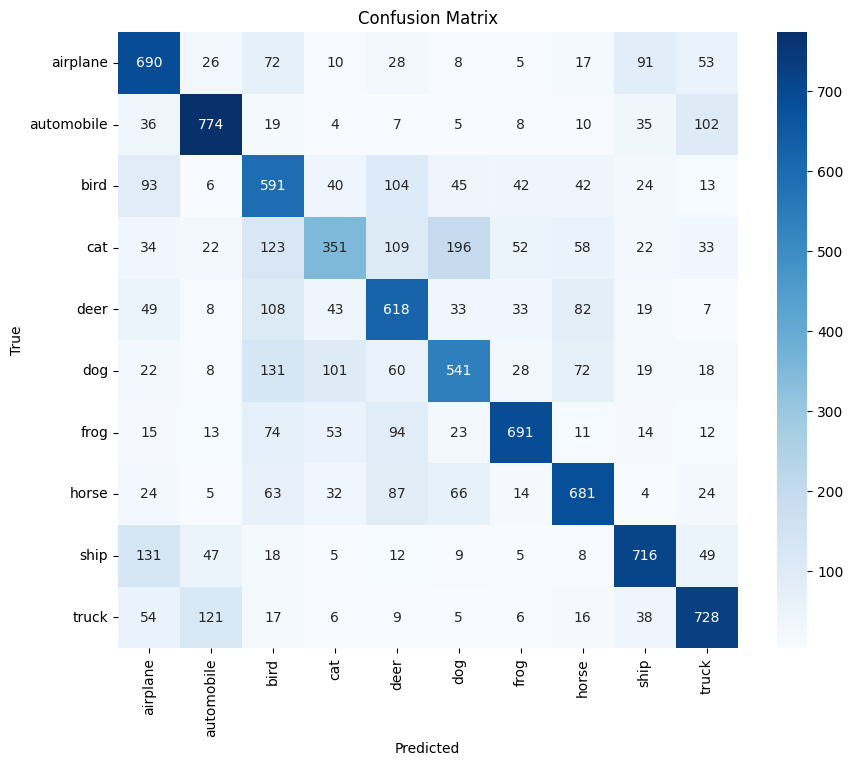

In [11]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Rakamsal gösterim

In [12]:
import pandas as pd


def calculate_confusion_matrix_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    return TP, FP, TN, FN

TP, FP, TN, FN = calculate_confusion_matrix_metrics(cm)

# Sınıf sayısını belirle
num_classes = len(class_names)

# Her bir sınıfa ait veri sayısını hesapla
class_counts = np.sum(cm, axis=1)

# Sonuçları bir DataFrame'de topla
results = {
    'Class': class_names,
    'Number of samples': class_counts,
    'True Positives': TP,
    'False Positives': FP,
    'True Negatives': TN,
    'False Negatives': FN
}

df_results = pd.DataFrame(results)
print(f"Total number of classes: {num_classes}\n")
print(df_results)

Total number of classes: 10

        Class  Number of samples  True Positives  False Positives  \
0    airplane               1000             690              458   
1  automobile               1000             774              256   
2        bird               1000             591              625   
3         cat               1000             351              294   
4        deer               1000             618              510   
5         dog               1000             541              390   
6        frog               1000             691              193   
7       horse               1000             681              316   
8        ship               1000             716              266   
9       truck               1000             728              311   

   True Negatives  False Negatives  
0            8542              310  
1            8744              226  
2            8375              409  
3            8706              649  
4            8490         

## Uygulama örneği Epoch 20 ile yeniden eğitilirse

In [13]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.5170 - accuracy: 0.8186 - val_loss: 1.2980 - val_accuracy: 0.6436
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4846 - accuracy: 0.8306 - val_loss: 1.3086 - val_accuracy: 0.6493
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4665 - accuracy: 0.8363 - val_loss: 1.4051 - val_accuracy: 0.6361
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4423 - accuracy: 0.8447 - val_loss: 1.4606 - val_accuracy: 0.6438
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4226 - accuracy: 0.8513 - val_loss: 1.5873 - val_accuracy: 0.6297
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.3905 - accuracy: 0.8629 - val_loss: 1.6208 - val_accuracy: 0.6289
Epoch 7/20
782/782 [==============================] - 4s 4ms/step - loss: 0.3807 - accuracy: 0.8678 - val_loss: 1.7344 - val_accuracy: 0.6317
Epoch 

## 20 Epoch ile görselleştirme

In [14]:
# CIFAR-10 sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
# Her sınıfa ait örnek sayısını hesapla
class_sample_counts = np.sum(y_test, axis=0)

In [16]:
# Model tahminlerini al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


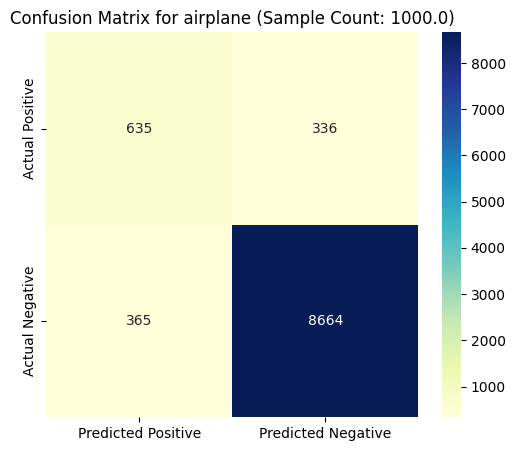

---------------------------------------------------------------------------


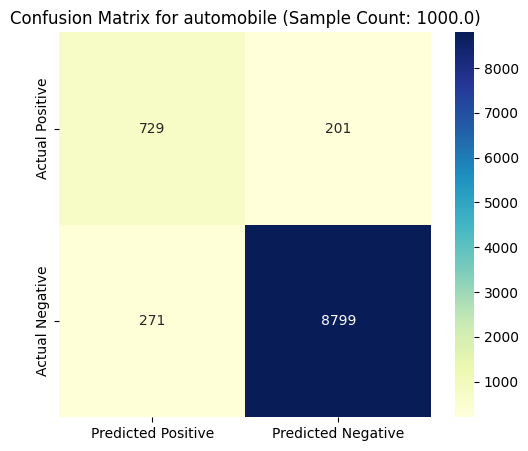

---------------------------------------------------------------------------


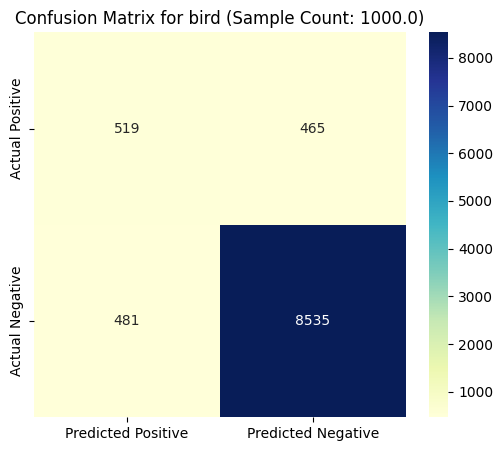

---------------------------------------------------------------------------


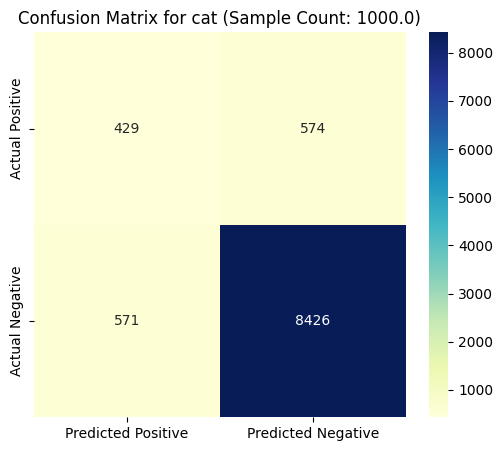

---------------------------------------------------------------------------


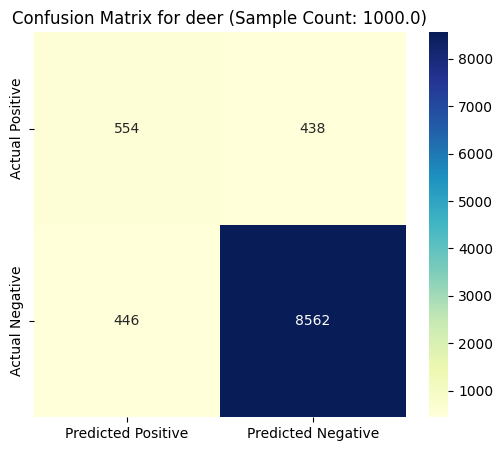

---------------------------------------------------------------------------


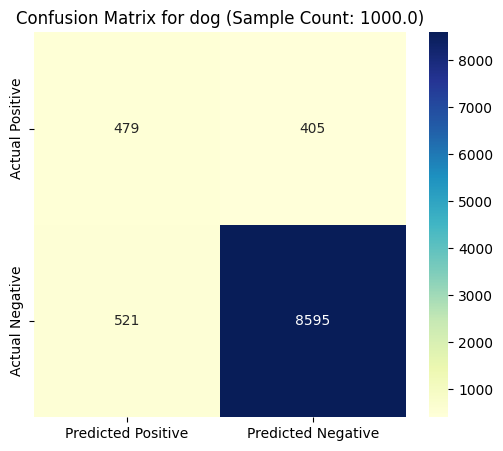

---------------------------------------------------------------------------


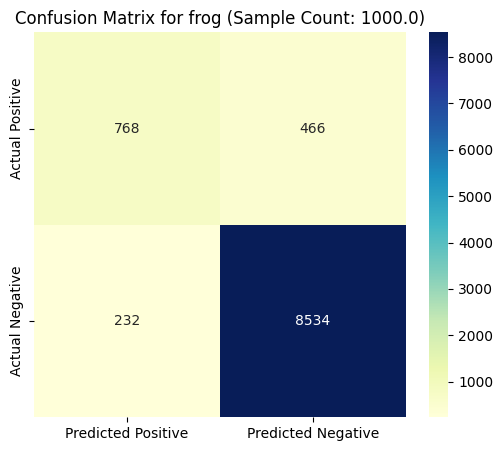

---------------------------------------------------------------------------


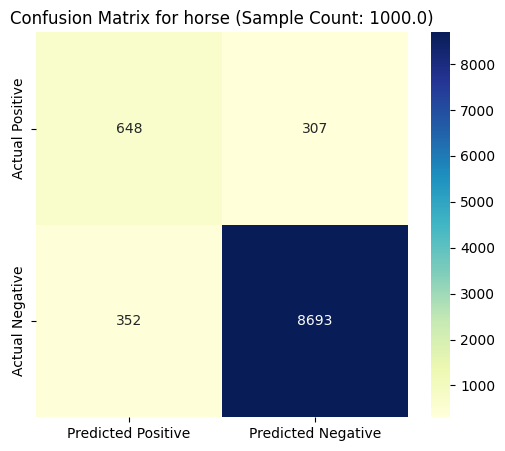

---------------------------------------------------------------------------


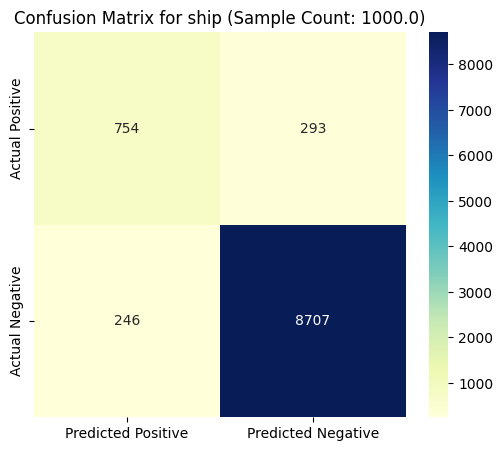

---------------------------------------------------------------------------


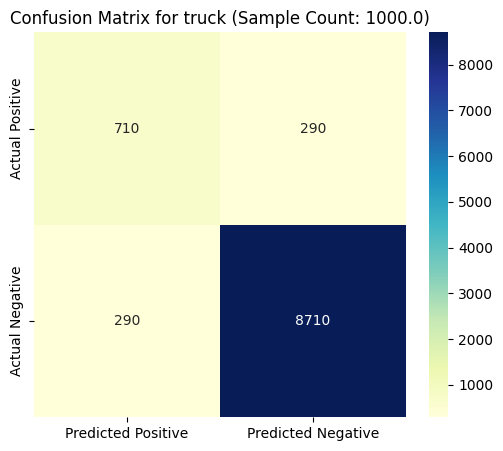

---------------------------------------------------------------------------


In [17]:
# Karışıklık matrisini oluştur
cm = confusion_matrix(y_true, y_pred_classes)

# Her sınıf için karışıklık matrisini ayrı ayrı görselleştir
for i, class_name in enumerate(class_names):
    class_cm = np.zeros((2, 2), dtype=int)
    for j in range(len(y_true)):
        if y_true[j] == i:
            if y_pred_classes[j] == i:
                class_cm[0, 0] += 1  # True Positive
            else:
                class_cm[1, 0] += 1  # False Negative
        else:
            if y_pred_classes[j] == i:
                class_cm[0, 1] += 1  # False Positive
            else:
                class_cm[1, 1] += 1  # True Negative

    # Karışıklık matrisini görselleştirme
    plt.figure(figsize=(6, 5))
    sns.heatmap(pd.DataFrame(class_cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative']), annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion Matrix for {class_name} (Sample Count: {class_sample_counts[i]})')
    plt.show()
    print('-'*75)